In [1]:
import tensorflow as tf 

In [4]:
from tensorflow.examples.tutorials.mnist  import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [9]:
mnist.train.images.shape


(55000, 784)

In [10]:
mnist.train.num_examples

55000

In [11]:
mnist.test.num_examples

10000

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [14]:
mnist.train.images[1].shape

(784,)

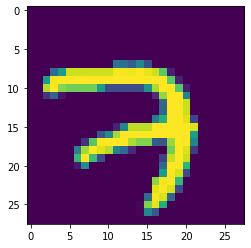

In [22]:
plt.imshow(mnist.train.images[0].reshape(28,28))

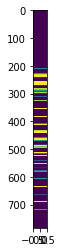

In [27]:
plt.imshow(mnist.train.images[0].reshape(784,1),aspect=0.02)

# CREATING OUR MODEL

In [28]:
#CREATE A PLACEHOLDER
x = tf.placeholder(tf.float32,shape=[None,784])

In [30]:
#the weights 
# we have ten because we have 10 possibilite of variables 
# 784 pixel
w = tf.Variable(tf.zeros([784,10]))

In [31]:
# bias
b = tf.Variable(tf.zeros([10]))

In [33]:
# create the graph 
y = tf.matmul(x,w)+b

In [34]:
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [38]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [39]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [40]:
train = optimizer.minimize(cross_entropy)

In [41]:
init = tf.global_variables_initializer()

In [44]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x,batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9132
